In [2]:
pip install xlrd==2.0.1


  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Memuat data dari file Excel
data = pd.read_excel('../csv/creditapproval.xls')

# Menampilkan 5 baris pertama data untuk verifikasi
print(data.head())


  nama_nasabah jenis_kelamin  umur  jml_pinjaman  jkw  jml_angsuran_per_bulan  \
0           x1             P  40.0      345000.0    1               345000.00   
1           x2             L  31.0      350000.0    7                55716.00   
2           x3             L  37.0      649926.0    6               108321.00   
3           x4             P   2.0      459168.0   12                38264.00   
4           x5             P  34.0     3055499.0    8               381937.41   

   type_pinjaman  jenis_pinjaman  bi_sektor_ekonomi  col  bi_golongan_debitur  \
0            100             301             6000.0    1                  874   
1            100             301             6000.0    1                  874   
2            100             301             6000.0    1                  874   
3            100             301             6000.0    1                  874   
4            100             301             6000.0    1                  874   

   bi_gol_penjamin  saldo_

In [4]:
# Memeriksa informasi data
print(data.info())

# Memeriksa apakah ada nilai yang hilang
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            866 non-null    object 
 1   jenis_kelamin           866 non-null    object 
 2   umur                    865 non-null    float64
 3   jml_pinjaman            866 non-null    float64
 4   jkw                     866 non-null    int64  
 5   jml_angsuran_per_bulan  866 non-null    float64
 6   type_pinjaman           866 non-null    int64  
 7   jenis_pinjaman          866 non-null    int64  
 8   bi_sektor_ekonomi       865 non-null    float64
 9   col                     866 non-null    int64  
 10  bi_golongan_debitur     866 non-null    int64  
 11  bi_gol_penjamin         866 non-null    int64  
 12  saldo_nominatif         866 non-null    float64
 13  tunggakan_pokok         866 non-null    float64
 14  tunggakan_bunga         866 non-null    fl

Untuk regresi logistik, kita perlu memilih fitur yang relevan dan label (variabel target) yang ingin diprediksi. Misalkan kita ingin memprediksi status kredit.

In [7]:
# Memilih fitur dan label
# Misalnya, kita menggunakan 'jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan' sebagai fitur
# dan 'status kredit' sebagai label

# Mengonversi 'jenis_kelamin' ke bentuk numerik
data['jenis_kelamin'] = data['jenis_kelamin'].map({'L': 1, 'P': 0})

# Memilih fitur yang relevan
# jangka waktu pinjaman jkw
features = ['jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan']
X = data[features]

# Mengonversi 'status kredit' ke bentuk numerik jika perlu
# Misalnya, 'Lancar' -> 1, 'Tidak Lancar' -> 0
data['status kredit'] = data['status kredit'].map({'Lancar': 1, 'Tidak Lancar': 0})
Y = data['status kredit']


  nama_nasabah jenis_kelamin  umur  jml_pinjaman  jkw  jml_angsuran_per_bulan  \
0           x1             P  40.0      345000.0    1               345000.00   
1           x2             L  31.0      350000.0    7                55716.00   
2           x3             L  37.0      649926.0    6               108321.00   
3           x4             P   2.0      459168.0   12                38264.00   
4           x5             P  34.0     3055499.0    8               381937.41   

   type_pinjaman  jenis_pinjaman  bi_sektor_ekonomi  col  bi_golongan_debitur  \
0            100             301             6000.0    1                  874   
1            100             301             6000.0    1                  874   
2            100             301             6000.0    1                  874   
3            100             301             6000.0    1                  874   
4            100             301             6000.0    1                  874   

   bi_gol_penjamin  saldo_

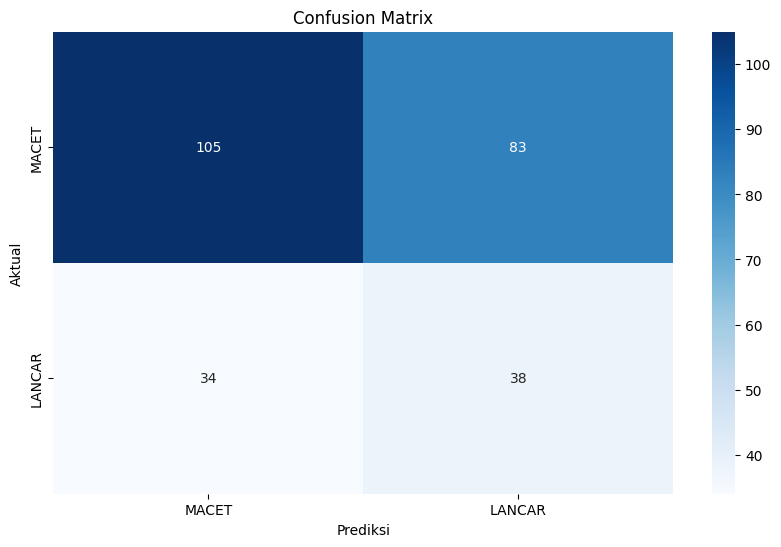

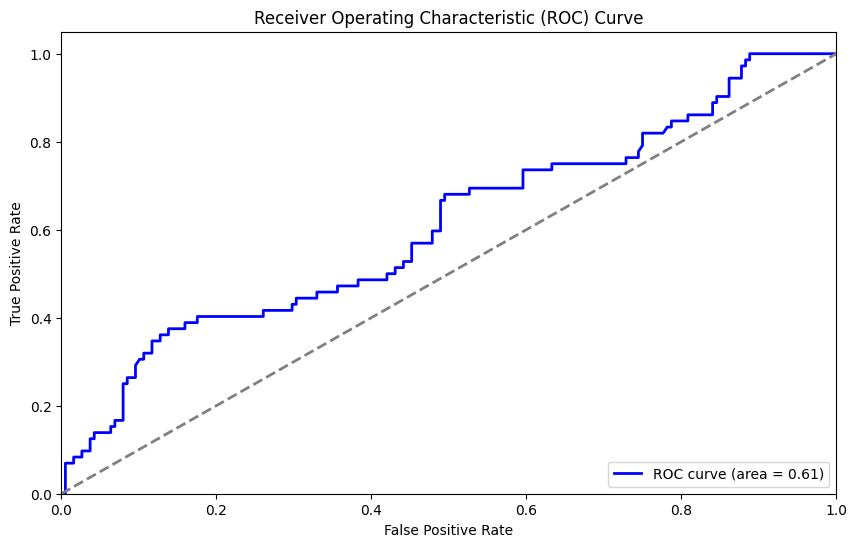

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file Excel
data = pd.read_excel('../csv/creditapproval.xls')

# Menampilkan 5 baris pertama data untuk verifikasi
print(data.head())

# Memeriksa apakah ada nilai yang hilang
print(data.isnull().sum())

# Mengisi nilai yang hilang (jika ada) hanya pada kolom numerik
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Mengonversi 'jenis_kelamin' ke bentuk numerik
data['jenis_kelamin'] = data['jenis_kelamin'].map({'L': 1, 'P': 0})

# Mengonversi 'status kredit' ke bentuk numerik jika perlu
data['status kredit'] = data['status kredit'].map({'LANCAR': 1, 'MACET': 0})

# Memeriksa tipe data dari fitur dan label
print(data.dtypes)

# Memastikan semua fitur yang dipilih adalah numerik
features = ['jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan']
X = data[features].astype(float)  # Mengonversi ke float jika perlu
Y = data['status kredit'].astype(int)  # Mengonversi ke int jika perlu

# Membagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model regresi logistik dengan pembobotan kelas
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, Y_train)

# Membuat prediksi
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualisasi Matriks Kebingungan
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['MACET', 'LANCAR'], yticklabels=['MACET', 'LANCAR'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi Kurva ROC
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
